# Week 2

As explained in in class during Lecture 1, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.


### LLM update

<div class="alert alert-block alert-info">
Since we're doing our LLM experiment, I've decided not just to use the blue boxes (like this one), but I have also added comments about how to use (and not to use) the LLMs. <font color="grey">I've put all of those comments in a special grey color - **like the one I'm using here** -  so you can easily spot them</font>.
</div>


## Overview

Today's lecture does a few things.
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots (Part 1,3,4).
* We will also talk a bit about what makes a good plot (Part 2).

# Part 1: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below

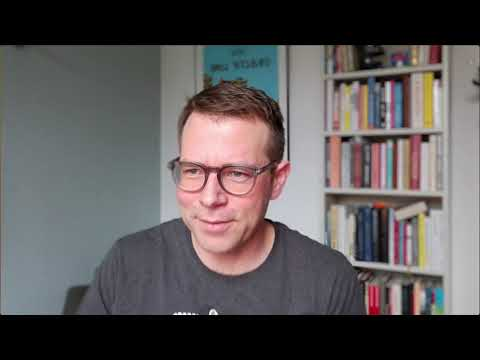

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('9hIu4pgJXQc', width=800, height=450)

> *Exercise:* Nice plots. 
>
> * Create a list of 10 rules for nice plots based on the video.

<div class="alert alert-block alert-info">
Answer in your own words, do your own research, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better.
</div>

# Part 2 Merging Historical and Recent Crime Data

So far we've been working with crime data from 2018 onwards (I will assume you have that file, named something like "Police Department Incident Reports 2018 to Present"). But San Francisco has published crime data going all the way back to 2003! Having access to this longer time series would let us:
- Study long-term trends in crime
- See how crime patterns changed before, during, and after major events
- Have more statistical power for our analyses

The catch? **The two datasets don't have the same structure.** This is an incredibly common situation in data science. Organizations change how they record data over time, different departments use different formats, and merging datasets requires careful thought.

## Step 2.1: Understand both schemas

> **Mini Exercise**: Schema exploration
>
> Download the historical dataset "Police Department Incident Reports: Historical 2003 to May 2018" from SF OpenData (or use the file provided).
>
> * Load both datasets and examine their columns
> * Which columns appear in both datasets (perhaps with different names)?
> * Which columns are unique to each dataset?
> * Create a "mapping" showing which columns in the historical data correspond to which columns in the recent data

Here's a starter to help you think about the mapping:

| Information | Historical Column | Recent Column |
|-------------|------------------|---------------|
| Crime type | `Category` | `Incident Category` |
| Police district | `PdDistrict` | `Police District` |
| Date | `Date` | `Incident Date` |
| ... | ... | ... |

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You should be able to do this no problem in pandas, but if you find it tough, feel free to ask an LLM for help.
</div>

## Step 2.2: Identify the common ground

> **Mini Exercise**: Essential columns
>
> * For the analyses we've have been doing (crime categories, time patterns, police districts), and *will be doing in future lectures* (**mapping GPS points**) which columns do we need?
> * Make a list of the essential/potentially interesting columns and their names in each dataset
> * Check the data types — are dates stored the same way? Are coordinates in the same format?
> * Handle any format differences (hint: look carefully at how dates are formatted in each file)

## Step 2.3: The Category Problem

This is where things get tricky (but interesting). The crime categories in the two datasets are **not the same**.

> **Mini Exercise**: Explore the category differences
>
> * List all unique categories in each dataset
> * How many categories are in the historical data? How many in the recent data?
> * Which categories appear to match (even if the names are slightly different)?
> * Which categories exist in one dataset but not the other?

### Intermezzo: The many flavors of category mismatch

Here are some concrete problems you'll discover:

**Problem 1: Case and formatting differences**

The historical data uses ALL CAPS (`ASSAULT`, `BURGLARY`) while the recent data uses Title Case (`Assault`, `Burglary`). This is easy to fix with `.str.upper()` or `.str.lower()`.

**Problem 2: Name changes**

Some categories look like they were simply renamed:
- `VEHICLE THEFT` → `Motor Vehicle Theft`

**Problem 3: Categories that split or merged**

This is trickier. For example:
- The historical `SEX OFFENSES` might correspond to multiple recent categories: `Sex Offense`, `Rape`, `Human Trafficking`
- The recent data has both `Drug Offense` and `Drug Violation` — should these both map to the historical `DRUG/NARCOTIC`?
- `VANDALISM` in historical data — is that `Vandalism` or `Malicious Mischief` in the recent data? Or both?

**Problem 4: Categories that disappeared or appeared**
- `DRUNKENNESS` exists in historical data but not in recent — was it merged into something else? Decriminalized? Maybe Google it or ask an LLM.
- `Traffic Collision` exists in recent data but not historical — is this a new category, or was it previously recorded differently?
- `Human Trafficking` appears in recent data — is this genuinely new, or was it previously categorized under something else?

**Problem 5: Ambiguous mappings**

Sometimes it's genuinely unclear how categories should map. Does historical `WEAPON LAWS` correspond to recent `Weapons Offense`, `Weapons Carrying Etc`, or both? Without detailed documentation (which often doesn't exist), you have to make judgment calls.

## Step 2.4: Solving the category problem

There are two ways that I can think of to approach this matching problem:

**Approach A: Manual inspection**

Look at both lists carefully and create mappings based on your judgment. 

**Approach B: Use an LLM to help**

LLMs have broad background knowledge about crime categories, legal terminology, and how classification systems work. I think that they might be surprisingly helpful here.

> **Exercise**: LLM-assisted category matching
>
> Try asking an LLM to help you match categories. Here's a suggested approach:
>
> 1. Give the LLM both lists of categories
> 2. Ask it to suggest which categories likely correspond to each other
> 3. Ask it to explain *why* it thinks certain categories match (this helps you evaluate its suggestions)
> 4. Ask it to flag any ambiguous cases where human judgment is needed
>
> **Important**: Don't blindly trust the LLM's suggestions! Use them as a starting point, then verify as described below.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> This is a <i>great</i> use case for LLMs — they have background knowledge about how crime categories work and can spot likely matches faster than manual inspection. But remember: the LLM is making educated guesses based on names. Always verify its suggestions against actual data when possible (see below).
</div>

### The crucial last step: Data-driven validation**

Even after creating a mapping, you should validate it:
- For categories you've matched, do the counts make sense? If `VANDALISM` mapped to `Malicious Mischief`, do you see roughly similar numbers of incidents per year?
- Look at the transition year (2018) — if your mapping is correct, the yearly/monthly trend should make sense. A sudden jump or drop suggests a mapping problem.

## Step 2.5: Define your Personal Focus Crimes

Given all these complications, it's time to make some decisions. You need to define a set of **Personal Focus Crimes** — categories that you can confidently track across both datasets.

> **Exercise**: Define Personal Focus Crimes
>
> Create a list of crime categories that:
> 1. Exist in both datasets (possibly with different names)
> 2. Have a mapping between the two naming systems that you trust based on checking trendlines
> 3. Are interesting enough to analyze (not too rare, not just "Other")
>
> For each Personal Focus Crime, document:
> - The name you'll use in your merged dataset
> - The corresponding category name in the historical data
> - The corresponding category name(s) in the recent data
> - Your confidence level (high/medium/low) in the mapping
> - Any notes or caveats
>
> **Example format:**
>
> | Personal Focus Crime | Historical | Recent | Confidence | Notes |
> |---------------------|------------|--------|------------|-------|
> | Assault | ASSAULT | Assault | High | Direct match |
> | Burglary | BURGLARY | Burglary | High | Direct match |
> | Drug Offense | DRUG/NARCOTIC | Drug Offense, Drug Violation | Medium | Merged two recent categories |
> | Vehicle Theft | VEHICLE THEFT | Motor Vehicle Theft | High | Name change only |
> | ... | ... | ... | ... | ... |
>
> It's completely fine if your Personal Focus Crimes list is shorter than our original focus crimes list. **Quality over quantity** — it's better to have 8 crimes you can track confidently than 16 where half are questionable.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Use your LLM to help identify good candidates and spot potential issues, but <b>you</b> need to make the final decisions about what goes on your list. These are judgment calls that affect all your downstream analysis.
</div>

## Step 2.6: Merge and validate

> **Exercise**: Now you're ready construct your final dataset and put the pieces from above together! Some of the key elements were
>
> * Standardize column names across both datasets
> * Apply your category mappings to create a unified category column
> * Concatenate the two datasets
> * Remove any duplicate records (there may be overlap around May 2018 — check for incidents that appear in both files)
> * **Save your merged dataset for use in future analyses**

> **Mini Exercise**: Quick visual overview to validate your merge
>
> Create a set of line plots showing yearly counts for each of your Personal Focus Crimes from 2003-2025 (or whatever your date range is).
>
> * Does 2018 look reasonable? The transition between datasets should be make sense
> * For any suspicious patterns, document what you found and how you addressed it (or why you left it as-is)

## Step 2.7: Think back on your work in this long and epic run of exercises.

> **Exercise**: 
>
> * What assumptions did you have to make during this merge?
> * Which of your Personal Focus Crimes are you most/least confident about? Why?
> * If someone used your merged dataset without reading your documentation, what mistakes might they make?
> * How does this experience connect to the "dirty data" concept from the Richardson et al. reading in Week 1?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The reflection should be your own thinking. No LLMs allowed. This is where you practice the critical data science reasoning that separates good analysts from people who just run code.
</div>

**Uncle Sune Rants**: This run of exercises and mini exercises in part 2 migth feel frustrating and difficult. If yes, that's awesome! That's the point. You're getting stronger, smarter, and ready for the real world.

In the real world, you almost never get perfectly clean, perfectly formatted data handed to you on a silver platter. The ability to wrangle messy, inconsistent data into a usable form is one of the most valuable skills in data science. And understanding the *assumptions* you make during this process is crucial. Those assumptions WILL come back to bite you if you're not careful.

The category matching problem is particularly important because **the categories we use shape what we can see**. If `DRUNKENNESS` disappeared as a category in 2018, it doesn't mean public intoxication stopped — it means we can't track it consistently over time. Being aware of these limitations of that type is essential for honest data analysis.

## Part 3: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's use our new mega dataset to look for interesting patterns in the big crime-data. Only consider your Personal Focus Crimes (see step 2.5 above). We'll be generating lots of plots, remember to add good axes, use subplots, pack the plots closely, etc.

* **Hint**: You may use this exercise as an extra validation of the personal focus crimes, and I won't be mad if you go back to step 2.5/2.6 and update your list after having done this exercise

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Hmm. Once in a while, I feel like I want to give more granualar / particular advice than I can achieve with the boxes. So I've decided to use the blue boxes (like this one) for <i>general advice</i>, but then I also have <font color="grey">special grey text, <b>like the one I'm using here</b>, directly in the exercise text, so I can be super particular</font>.
</div>



> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> 
> * *Yearly trends*. Redo the plots from last week with the new dataset. Do you see anything that surprises you?
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday (Monday, Tuesday, ...). 
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.
>
> <font color="grey">It's OK to ask your LLM for help with creating these plots, but</font>
>
> * <font color="grey">Try on your own first,</font>
> * <font color="grey">Then use the LLM ***as a kind of TA*** to help you get your code to work.</font>
>   
> <font color="grey">So don't just ask for answers and pre-written code, then you won't learn how to code & plot in Python - especially the parts about counting the various dates. By actually doing it, you'll start to get a feel for how to slice and dice your dataset according to temporal markers - and that's a key part of data science. You'll be on your way to becoming a true *data whisperer*</font>.

<div class="alert alert-block alert-info">
It's OK to ask your LLM for help with creating these plots, but try on your own first, only after that use the LLM ***as a kind of TA*** to help you get your code to work. Don't just ask for answers and pre-written code, since then you won't learn how to code & plot in Python - especially the parts about counting the various dates. By actually doing it, you'll start to get a feel for how to slice and dice your dataset according to temporal markers - and that's a key part of data science. You'll be on your way to becoming a true data whisperer.
</div>


# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).
> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`
> * Reflection (<font color="grey">no LLM help here</font>): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

**Note**: I added this exercise with fewer hints than usual. Normally, I help you break down the problems into small solvable bits. <font color="grey">Since this is a LLM exercise, I haven't done that. But I encourage you to play with figuring out the steps in solving the problem. You can ask the LLM to help you if you like (but perhaps try yourself first and compare to what the LLM suggested).</font> 

This ties in to a bigger picture thing about data science.

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. <font color="grey">This is one of the areas where LLMs can be of help -- they excel at breaking down problems into smaller bits -- but if you don't try yourself, you'll never get good at it. So always create your own breakdown first, then see what the computer thinks. Perhaps it can help you get better at it 😀 </font>.

*My approach is always to think*: Even if my task seems impossible, I think: "is there any problem that I ***CAN*** solve that will get me closer to where I want to go?" Once I've solved that part, I'm smarter and I try to think: "Is there a new problem I can solve that'll get me closer knowing what I know now?" And I just keep going. Usually that's enough.

*If that seems too abstract*, a useful goal for you is to use your internet searching skills (old fashioned ones) to figure out how to make each visualization work -- look for examples, tutorials, stack overflow posts, people who have found the same error messages as you, etc, etc. <font color="grey">And of course consulting your LLM</font>.

<div class="alert alert-block alert-info">
Detailed LLM hints in gray in the text itself.
</div>